In [2]:
!wget https://s3.amazonaws.com/assets.datacamp.com/production/course_3629/fake_or_real_news.csv

--2020-02-26 15:45:02--  https://s3.amazonaws.com/assets.datacamp.com/production/course_3629/fake_or_real_news.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.106.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.106.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30696129 (29M) [text/csv]
Saving to: ‘fake_or_real_news.csv’

fake_or_real_news.c 100%[===================>]  29.27M   198KB/s    in 2m 3s   

2020-02-26 15:47:07 (244 KB/s) - ‘fake_or_real_news.csv’ saved [30696129/30696129]



In [3]:
import pandas as pd

p = "fake_or_real_news.csv"

df = pd.read_csv(p)

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df = df.iloc[:1000, :]

In [8]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


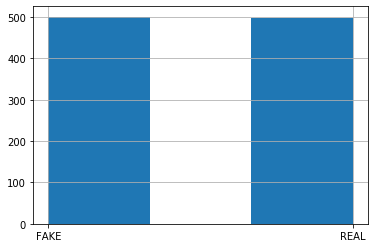

In [9]:
df.label.hist(bins=3)

In [10]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [11]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

In [12]:
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '001', '005s', '00pm', '01', '010', '011', '013c2812c9']


In [13]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])


['00', '000', '0000', '001', '005s', '00pm', '01', '010', '011', '013c2812c9']


In [14]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

[[0.         0.02623447 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03577129 0.         ... 0.         0.         0.        ]]


In [15]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())


# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

   00  000  0000  001  005s  00pm  01  010  011  013c2812c9  ...  ťnew  ťnon  \
0   0    1     0    0     0     0   0    0    0           0  ...     0     0   
1   0    0     0    0     0     0   0    0    0           0  ...     0     0   
2   0    0     0    0     0     0   0    1    0           0  ...     0     0   
3   0    0     0    0     0     0   0    0    0           0  ...     0     0   
4   0    2     0    0     0     0   0    0    0           0  ...     0     0   

   ťpilgrim  ťsecond  ťthe  ťthird  ťtwo  ťwho  ťđ  октября  
0         0        0     0       0     0     0   0        0  
1         0        0     0       0     0     0   0        0  
2         0        0     0       0     0     0   0        0  
3         0        0     0       0     0     0   0        0  
4         0        0     0       0     0     0   0        0  

[5 rows x 25666 columns]
    00       000  0000  001  005s  00pm   01       010  011  013c2812c9  ...  \
0  0.0  0.026234   0.0  0.0   0.0   0.0  

In [16]:
# Calculate the difference in columns: difference
difference = set(tfidf_df.columns) - set(count_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

set()
False


In [21]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = sklearn.metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.8515151515151516
[[140  38]
 [ 11 141]]


In [22]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

In [23]:
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

0.6787878787878788


In [24]:
# Calculate the confusion matrix: cm
cm =  metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

[[ 73 105]
 [  1 151]]


In [25]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.6787878787878788
[[ 73 105]
 [  1 151]]


In [27]:
import numpy as np

# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.793939393939394

Alpha:  0.1
Score:  0.8333333333333334

Alpha:  0.2
Score:  0.7909090909090909

Alpha:  0.30000000000000004
Score:  0.7696969696969697

Alpha:  0.4
Score:  0.7454545454545455

Alpha:  0.5
Score:  0.7272727272727273

Alpha:  0.6000000000000001
Score:  0.7121212121212122

Alpha:  0.7000000000000001
Score:  0.7121212121212122

Alpha:  0.8
Score:  0.696969696969697

Alpha:  0.9
Score:  0.6848484848484848



/home/shudipto/miniconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [29]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

FAKE [(-10.305638321169491, '005s'), (-10.305638321169491, '00pm'), (-10.305638321169491, '013c2812c9'), (-10.305638321169491, '03'), (-10.305638321169491, '031'), (-10.305638321169491, '032'), (-10.305638321169491, '04pm'), (-10.305638321169491, '06'), (-10.305638321169491, '06pm'), (-10.305638321169491, '07'), (-10.305638321169491, '07dryempjx'), (-10.305638321169491, '08'), (-10.305638321169491, '09'), (-10.305638321169491, '0_65b67362bd'), (-10.305638321169491, '0_kvyhphja'), (-10.305638321169491, '0dpbdk6rjd'), (-10.305638321169491, '1000'), (-10.305638321169491, '10000s'), (-10.305638321169491, '100percentfedup'), (-10.305638321169491, '101')]


In [30]:
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

REAL [(-8.4034031600671, 'presidential'), (-8.370219505908619, 'democratic'), (-8.317869679121493, 'states'), (-8.303740593755247, 'rubio'), (-8.296361794411249, 'percent'), (-8.256416467333738, 'people'), (-8.25079267485726, 'voters'), (-8.250726993144841, 'bush'), (-8.131356488212443, 'new'), (-8.069742996685145, 'party'), (-8.042319524733681, 'republican'), (-7.995226747517835, 'state'), (-7.921682224826581, 'president'), (-7.91863351852418, 'cruz'), (-7.832734164733164, 'campaign'), (-7.83091334494222, 'sanders'), (-7.738205226555378, 'obama'), (-7.2988892365406475, 'clinton'), (-7.255694100583334, 'said'), (-6.985804712269109, 'trump')]
